In [64]:
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris





In [65]:
patients = "KaggleV2-May-2016.csv"
patientsdf = pd.read_csv(patients)

In [66]:
patientsdf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [67]:
patientsdf.shape

(110527, 14)

In [68]:
patientsdf['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [69]:
n_rows_to_select = 1000

In [70]:
no_show_patientsdf = patientsdf[patientsdf['No-show']=='Yes']
print(no_show_patientsdf.shape)
no_show_patientsdf = no_show_patientsdf.sample(n = n_rows_to_select, random_state = 1)
print(no_show_patientsdf.shape)

(22319, 14)
(1000, 14)


In [71]:
show_patientsdf = patientsdf[patientsdf['No-show']=='No']
print(show_patientsdf.shape)
show_patientsdf = show_patientsdf.sample(n = n_rows_to_select, random_state = 1)
print(show_patientsdf.shape)

(88208, 14)
(1000, 14)


In [72]:
reduced_patientsdf = no_show_patientsdf.append(show_patientsdf)
reduced_patientsdf.shape

(2000, 14)

In [73]:
reduced_patientsdf.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
21493,3.995968e+13,5721859,F,2016-05-19T18:36:51Z,2016-05-25T00:00:00Z,70,RESISTÊNCIA,0,0,0,0,0,1,Yes
43583,5.225259e+12,5615792,F,2016-04-25T13:04:29Z,2016-05-16T00:00:00Z,5,MARUÍPE,0,0,0,0,0,0,Yes
102261,4.855338e+10,5741721,F,2016-05-30T07:21:52Z,2016-06-01T00:00:00Z,61,CRUZAMENTO,0,1,0,0,0,0,Yes
79146,4.438746e+11,5611417,M,2016-04-25T07:11:15Z,2016-05-31T00:00:00Z,82,SÃO CRISTÓVÃO,0,1,0,0,0,0,Yes
80321,6.754980e+12,5621724,M,2016-04-26T10:43:10Z,2016-05-04T00:00:00Z,3,PIEDADE,0,0,0,0,0,1,Yes
56400,4.792238e+12,5642496,M,2016-04-29T16:07:31Z,2016-05-31T00:00:00Z,4,SÃO BENEDITO,0,0,0,0,0,0,Yes
50556,8.469383e+13,5543399,F,2016-04-05T10:06:39Z,2016-05-03T00:00:00Z,16,SANTOS DUMONT,1,0,0,0,0,1,Yes
45775,1.988177e+13,5638238,F,2016-04-29T07:50:20Z,2016-05-25T00:00:00Z,24,FRADINHOS,0,0,0,0,0,1,Yes
46583,3.118989e+13,5715641,F,2016-05-18T14:47:37Z,2016-05-30T00:00:00Z,89,ILHA DO PRÍNCIPE,0,1,0,0,2,0,Yes
59762,4.763459e+13,5615790,M,2016-04-25T13:04:12Z,2016-05-03T00:00:00Z,27,ILHA DE SANTA MARIA,0,0,0,0,0,1,Yes


In [74]:
reduced_patientsdf['No-show'].value_counts()

Yes    1000
No     1000
Name: No-show, dtype: int64

In [75]:
reduced_patientsdf.replace(['Yes', 'No'], value=[0, 1])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
21493,3.995968e+13,5721859,F,2016-05-19T18:36:51Z,2016-05-25T00:00:00Z,70,RESISTÊNCIA,0,0,0,0,0,1,0
43583,5.225259e+12,5615792,F,2016-04-25T13:04:29Z,2016-05-16T00:00:00Z,5,MARUÍPE,0,0,0,0,0,0,0
102261,4.855338e+10,5741721,F,2016-05-30T07:21:52Z,2016-06-01T00:00:00Z,61,CRUZAMENTO,0,1,0,0,0,0,0
79146,4.438746e+11,5611417,M,2016-04-25T07:11:15Z,2016-05-31T00:00:00Z,82,SÃO CRISTÓVÃO,0,1,0,0,0,0,0
80321,6.754980e+12,5621724,M,2016-04-26T10:43:10Z,2016-05-04T00:00:00Z,3,PIEDADE,0,0,0,0,0,1,0
56400,4.792238e+12,5642496,M,2016-04-29T16:07:31Z,2016-05-31T00:00:00Z,4,SÃO BENEDITO,0,0,0,0,0,0,0
50556,8.469383e+13,5543399,F,2016-04-05T10:06:39Z,2016-05-03T00:00:00Z,16,SANTOS DUMONT,1,0,0,0,0,1,0
45775,1.988177e+13,5638238,F,2016-04-29T07:50:20Z,2016-05-25T00:00:00Z,24,FRADINHOS,0,0,0,0,0,1,0
46583,3.118989e+13,5715641,F,2016-05-18T14:47:37Z,2016-05-30T00:00:00Z,89,ILHA DO PRÍNCIPE,0,1,0,0,2,0,0
59762,4.763459e+13,5615790,M,2016-04-25T13:04:12Z,2016-05-03T00:00:00Z,27,ILHA DE SANTA MARIA,0,0,0,0,0,1,0


In [76]:
print(show_patientsdf.shape)

(1000, 14)


In [77]:
patientsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [78]:
pd.options.display.max_rows = 4000
patientsdf.groupby('No-show').describe().transpose()

No-show                        No           Yes
PatientId     count  8.820800e+04  2.231900e+04
              mean   1.476845e+14  1.467523e+14
              std    2.563747e+14  2.549905e+14
              min    3.921784e+04  5.628261e+06
              25%    4.168386e+12  4.176779e+12
              50%    3.176184e+13  3.156794e+13
              75%    9.433715e+13  9.454270e+13
              max    9.999816e+14  9.996585e+14
AppointmentID count  8.820800e+04  2.231900e+04
              mean   5.681137e+06  5.652259e+06
              std    6.931225e+04  7.429686e+04
              min    5.030230e+06  5.122866e+06
              25%    5.646218e+06  5.614192e+06
              50%    5.685684e+06  5.657916e+06
              75%    5.731078e+06  5.703175e+06
              max    5.790484e+06  5.789986e+06
Age           count  8.820800e+04  2.231900e+04
              mean   3.779006e+01  3.431767e+01
              std    2.333888e+01  2.196594e+01
              min   -1.000000e+00  0.000000e+00
              25%    1.800000e+01  1.600000e+01
              50%    3.800000e+01  3.300000e+01
              75%    5.600000e+01  5.100000e+01
              max    1.150000e+02  1.150000e+02
Scholarship   count  8.820800e+04  2.231900e+04
              mean   9.390305e-02  1.155070e-01
              std    2.916954e-01  3.196399e-01
              min    0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00
              50%    0.000000e+00  0.000000e+00
              75%    0.000000e+00  0.000000e+00
              max    1.000000e+00  1.000000e+00
Hipertension  count  8.820800e+04  2.231900e+04
              mean   2.043919e-01  1.690040e-01
              std    4.032588e-01  3.747638e-01
              min    0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00
              50%    0.000000e+00  0.000000e+00
              75%    0.000000e+00  0.000000e+00
              max    1.000000e+00  1.000000e+00
Diabetes      count  8.820800e+04  2.231900e+04
              mean   7.383684e-02  6.407097e-02
              std    2.615067e-01  2.448848e-01
              min    0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00
              50%    0.000000e+00  0.000000e+00
              75%    0.000000e+00  0.000000e+00
              max    1.000000e+00  1.000000e+00
Alcoholism    count  8.820800e+04  2.231900e+04
              mean   3.041674e-02  3.033290e-02
              std    1.717321e-01  1.715055e-01
              min    0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00
              50%    0.000000e+00  0.000000e+00
              75%    0.000000e+00  0.000000e+00
              max    1.000000e+00  1.000000e+00
Handcap       count  8.820800e+04  2.231900e+04
              mean   2.274170e-02  2.029661e-02
              std    1.627497e-01  1.566699e-01
              min    0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00
              50%    0.000000e+00  0.000000e+00
              75%    0.000000e+00  0.000000e+00
              max    4.000000e+00  4.000000e+00
SMS_received  count  8.820800e+04  2.231900e+04
              mean   2.913341e-01  4.383709e-01
              std    4.543797e-01  4.961984e-01
              min    0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00
              50%    0.000000e+00  0.000000e+00
              75%    1.000000e+00  1.000000e+00
              max    1.000000e+00  1.000000e+00

In [79]:
patientsdf.rename(columns={"Hipertension": "Hypertension","Handcap":"Handicap",
                      "SMS_received": "SMSReceived", "No-show": "NoShow"},inplace=True)

In [80]:
patientsdf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [81]:
print(sorted(patientsdf['Neighbourhood'].unique()))

['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA

In [82]:
print(sorted(patientsdf['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [83]:
patientsdf[patientsdf['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [84]:
patientsdf[patientsdf['Age'] == 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [85]:
patientsdf['PatientId'] = patientsdf['PatientId'].astype('int64')


In [86]:
patientsdf['ScheduledDay'] = pd.to_datetime(patientsdf['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [87]:
patientsdf['AppointmentDay'] = pd.to_datetime(patientsdf['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [88]:
patientsdf= patientsdf[(patientsdf['Age'] < 115) & (patientsdf['Age'] > 0)]

In [89]:
patientsdf= patientsdf.drop(['PatientId','AppointmentID'],axis=1)

In [90]:
patientsdf = patientsdf.drop(['ScheduledDay','AppointmentDay'],axis=1)

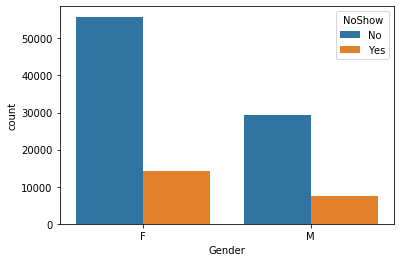

In [91]:
sns.countplot(x='Gender', hue='NoShow', data=patientsdf)

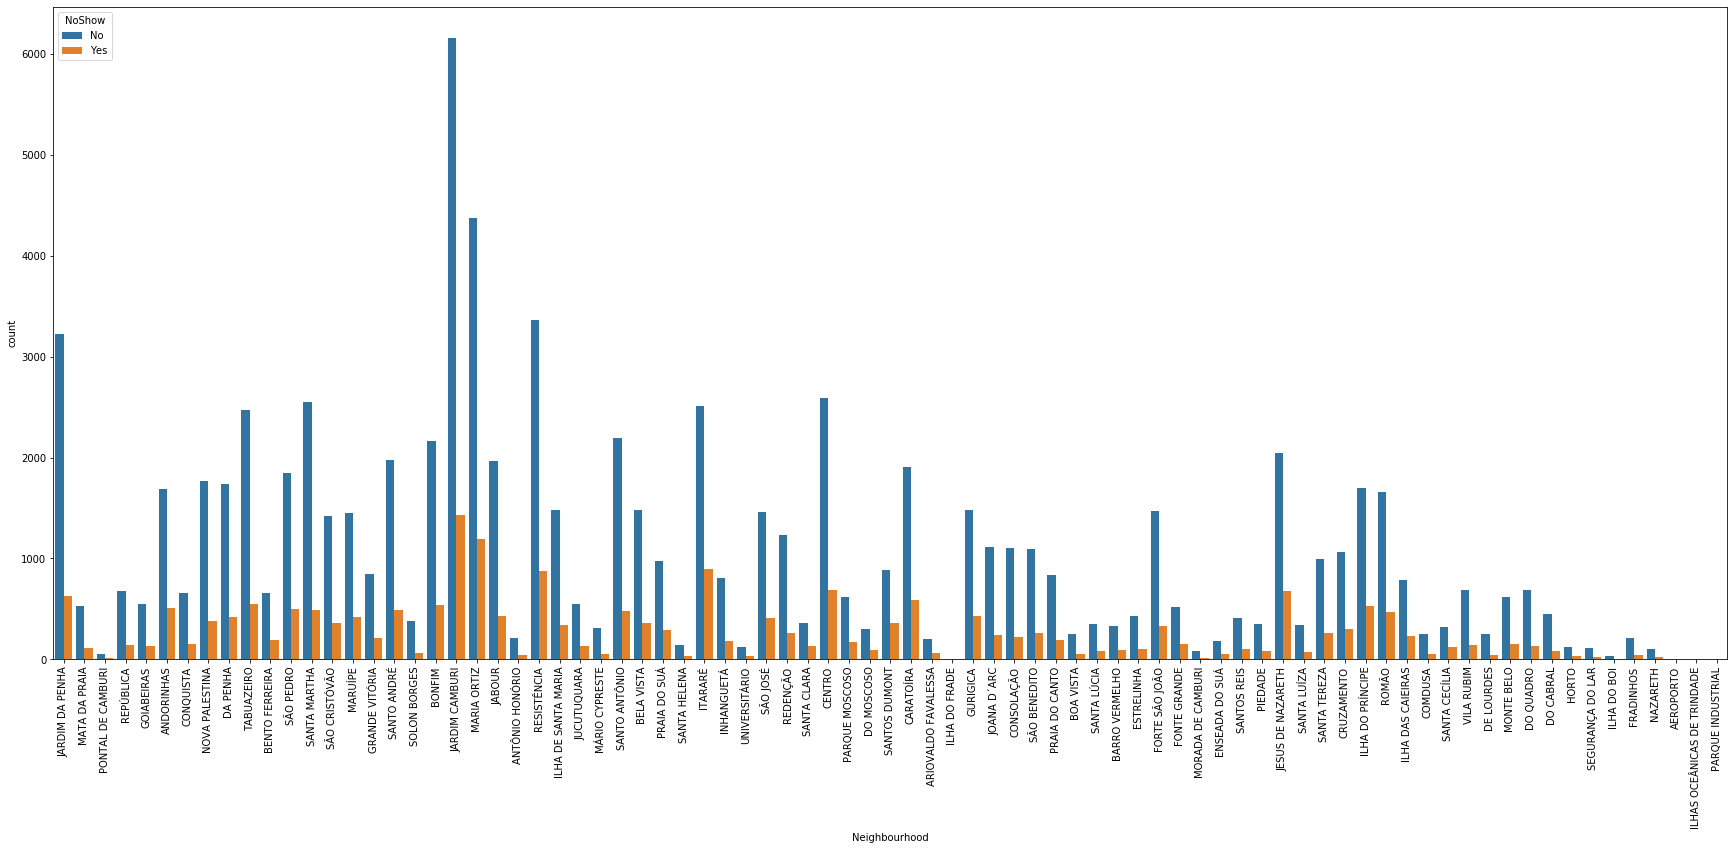

In [92]:
plt.figure(figsize=(30,12))
fig = sns.countplot(x='Neighbourhood',hue='NoShow',data=patientsdf)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

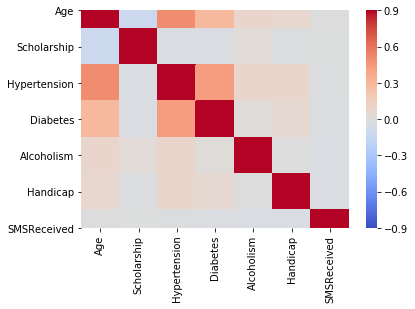

In [93]:
sns.heatmap(patientsdf.corr(), vmin=-0.9, vmax=0.9,cmap='coolwarm')


In [94]:
y = pd.get_dummies(patientsdf.NoShow, prefix='NoShow')

In [95]:
y

,NoShow_No,NoShow_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
110522,1,0
110523,1,0
110524,1,0
110525,1,0


In [96]:
patientsdf

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [97]:
patientsdf['NoShow'] = pd.get_dummies(patientsdf['NoShow'])['Yes']
no_show = len(patientsdf[patientsdf['NoShow'] == 1])
print(f'No-shows: {no_show}')

total = len(patientsdf)
print(f'Percentage no-show: {(no_show/total) * 100}')

No-shows: 21677
Percentage no-show: 20.262287113720063


In [98]:
print(f"Gender entries: {patientsdf['Gender'].unique()}")
print(patientsdf['Gender'].describe())
patientsdf['Male'] = pd.get_dummies(patientsdf['Gender'])['M']
      
patientsdf = patientsdf.drop('Gender',axis=1)

Gender entries: ['F' 'M']
count     106982
unique         2
top            F
freq       70113
Name: Gender, dtype: object


In [99]:
neighbourhoods = pd.get_dummies(patientsdf['Neighbourhood'])
patientsdf = patientsdf.join(neighbourhoods).drop('Neighbourhood',axis=1)

In [100]:
scaler = StandardScaler()
scaler.fit(patientsdf.drop(['NoShow'],axis=1))
scaled_features = scaler.transform(patientsdf.drop('NoShow',axis=1))


In [101]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1.054628,-0.335248,1.976722,-0.283197,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
1,0.787493,-0.335248,-0.505888,-0.283197,-0.180071,-0.139861,-0.691153,1.379014,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
2,1.054628,-0.335248,-0.505888,-0.283197,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
3,-1.349591,-0.335248,-0.505888,-0.283197,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
4,0.787493,-0.335248,1.976722,3.531107,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371


In [102]:
X = df_feat
y = patientsdf['NoShow']
attribute_names = X.columns

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [104]:
patientsdf_feat = pd.DataFrame(scaled_features)
patientsdf_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,1.054628,-0.335248,1.976722,-0.283197,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
1,0.787493,-0.335248,-0.505888,-0.283197,-0.180071,-0.139861,-0.691153,1.379014,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
2,1.054628,-0.335248,-0.505888,-0.283197,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
3,-1.349591,-0.335248,-0.505888,-0.283197,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371
4,0.787493,-0.335248,1.976722,3.531107,-0.180071,-0.139861,-0.691153,-0.725156,-0.008648,-0.144597,...,-0.069888,-0.036199,-0.065138,-0.113092,-0.130262,-0.133272,-0.149735,-0.170409,-0.037596,-0.088371


In [105]:
dtree = DecisionTreeClassifier(random_state = 1)
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
dtree.score(X_test,y_test)

0.7578439009191463

In [106]:
print(classification_report(y_test,dtree_pred))
#coefficient, regularized (c-parameter maybe for logistic regression), n_estimators, max_depth, class_weight

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     25508
           1       0.30      0.14      0.19      6587

    accuracy                           0.76     32095
   macro avg       0.55      0.53      0.52     32095
weighted avg       0.70      0.76      0.72     32095



In [107]:
print("Confusion matrix:\n",confusion_matrix(y_test, dtree_pred))

Confusion matrix:
 [[23424  2084]
 [ 5688   899]]


In [108]:
y_test

107792    0
61703     0
101544    0
17062     0
90481     0
         ..
99716     0
38098     0
85569     1
15226     0
17827     0
Name: NoShow, Length: 32095, dtype: uint8

In [109]:
sum(y_test)

6587

In [110]:
len(y_test)

32095

In [111]:
sum(y_test)/len(y_test)

0.20523446019629227

In [112]:
rf = RandomForestClassifier(n_estimators=100,verbose=5)

In [113]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.9s finished


RandomForestClassifier(verbose=5)

In [114]:
rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


0.7554759308303474

In [115]:
importances = rf.feature_importances_
importances

array([6.14437248e-01, 1.54039814e-02, 1.69884432e-02, 1.62916208e-02,
       1.20510407e-02, 1.27519259e-02, 4.03647593e-02, 4.19585725e-02,
       2.08231410e-05, 4.55037829e-03, 1.25421064e-03, 1.64949711e-03,
       1.83039113e-03, 4.18188046e-03, 2.99348350e-03, 1.81419173e-03,
       5.09218488e-03, 3.63652447e-03, 4.82505639e-03, 1.62318278e-03,
       2.87349643e-03, 3.44954076e-03, 4.03024785e-03, 4.51032909e-03,
       1.66439821e-03, 2.19302915e-03, 2.36196963e-03, 2.92015143e-03,
       1.46214066e-03, 2.68342842e-03, 3.08071736e-03, 3.43413400e-03,
       1.38832005e-03, 2.45508004e-03, 3.52629727e-03, 4.34392764e-03,
       1.35797108e-03, 3.33990059e-03, 3.28240519e-03, 1.02927480e-04,
       1.16915591e-04, 3.71375163e-03, 2.44234377e-04, 3.57343515e-03,
       3.84530398e-03, 3.21132283e-03, 5.02374442e-03, 3.08657476e-03,
       3.40651427e-03, 3.64743165e-03, 2.25708025e-03, 3.60459666e-03,
       4.09482334e-03, 2.30242462e-03, 2.79425630e-03, 5.61918956e-04,
      

In [116]:
rf_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [117]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     25508
           1       0.31      0.16      0.21      6587

    accuracy                           0.76     32095
   macro avg       0.56      0.53      0.53     32095
weighted avg       0.70      0.76      0.72     32095



In [118]:
print("Confusion matrix:\n",confusion_matrix(y_test, rf_pred))

Confusion matrix:
 [[23223  2285]
 [ 5563  1024]]


In [ ]:
#scatter plot actual value vs. predicted value 
#city: Tableau geolocation to plot on the map, geojson 